In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', None)

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
#Checking for missing values
df1 = data.isnull().sum().to_frame().rename(columns = {0: 'Missing datas'})
df2 = data.dtypes.to_frame().rename(columns ={0 : 'dtypes'})
df = pd.concat([df1,df2], axis =1)
df

,Missing datas,dtypes
Daily Time Spent on Site,0,float64
Age,0,int64
Area Income,0,float64
Daily Internet Usage,0,float64
Ad Topic Line,0,object
City,0,object
Male,0,int64
Country,0,object
Timestamp,0,object
Clicked on Ad,0,int64


In [8]:
data['Clicked on Ad'].value_counts(normalize = True)  #Target variable is equally distrubted

1    0.5
0    0.5
Name: Clicked on Ad, dtype: float64

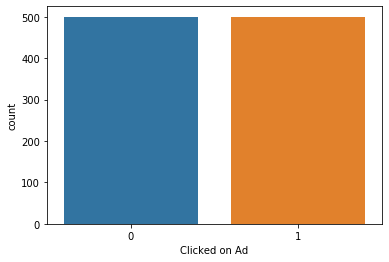

In [5]:
sns.countplot(data['Clicked on Ad'])

In [10]:
#Univariate analysis
def univar_graph(df, col, vartype):
    plt.figure(figsize = (7,5))
    sns.countplot(data[col], hue=data['Clicked on Ad'])
    plt.ylabel('Lead Number')
    plt.xlabel(col)
    plt.xticks(rotation=90)

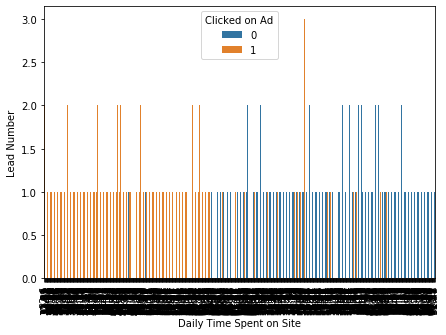

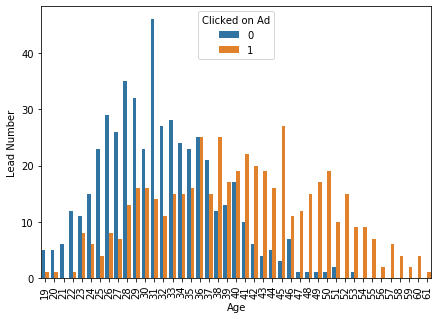

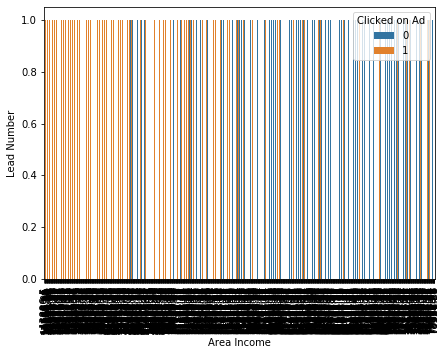

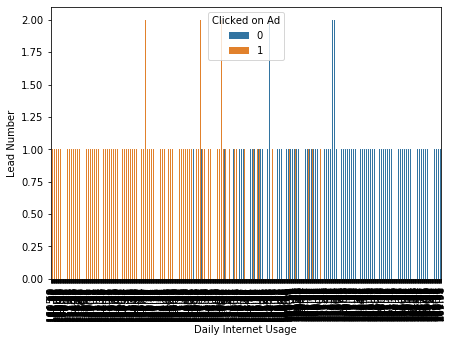

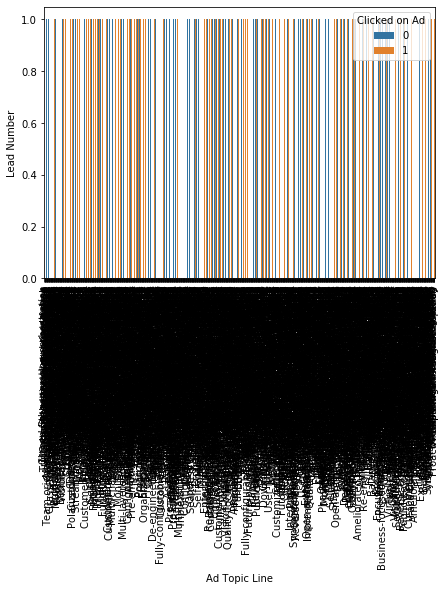

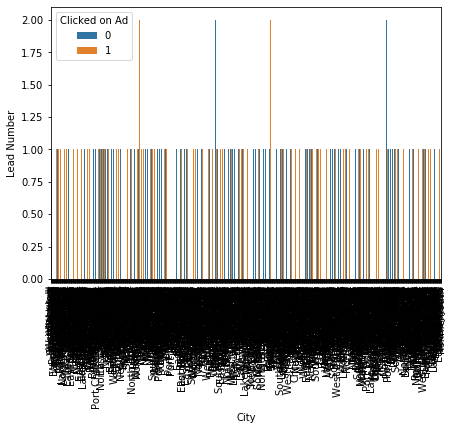

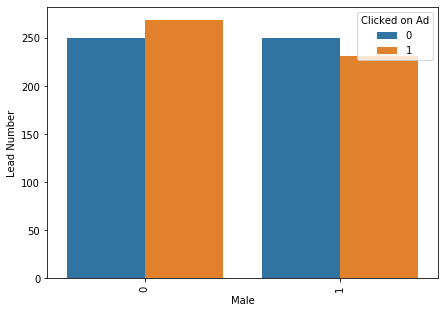

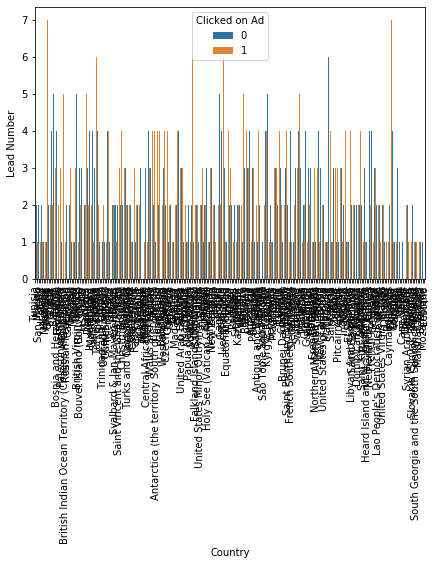

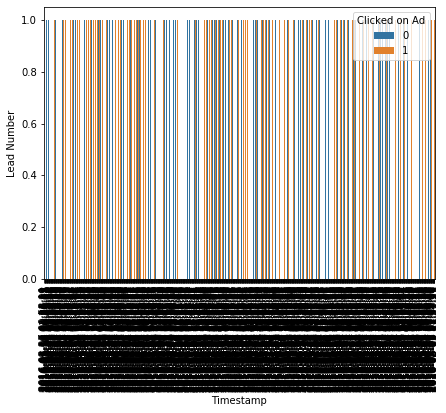

In [12]:
col_graph = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp']]
for item in col_graph:
    univar_graph(df=data,col=item,vartype=1)

In [13]:
def outlier_graph(df, col, vartype):
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(data[col],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data =data, x=col,ax=ax[1],orient='v')

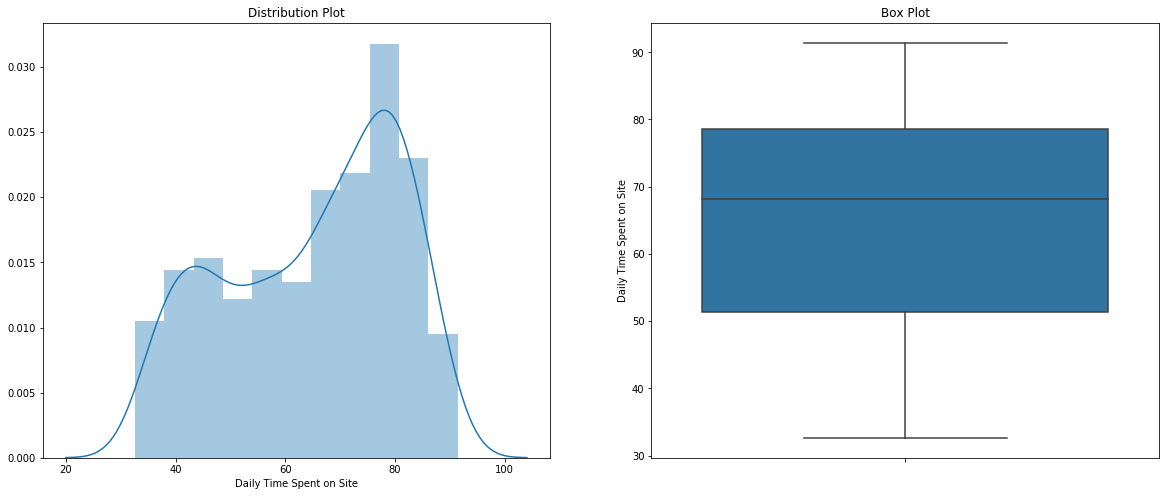

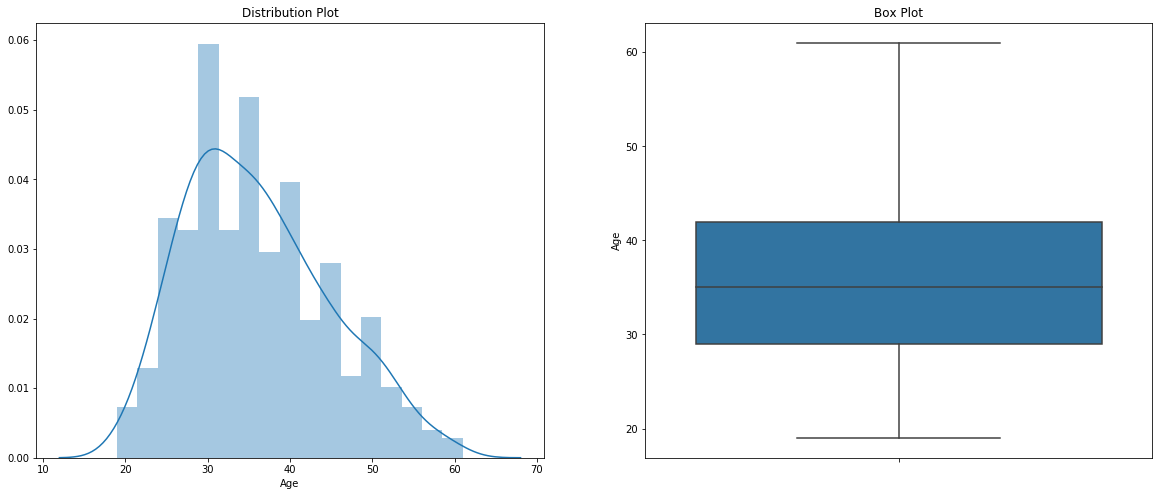

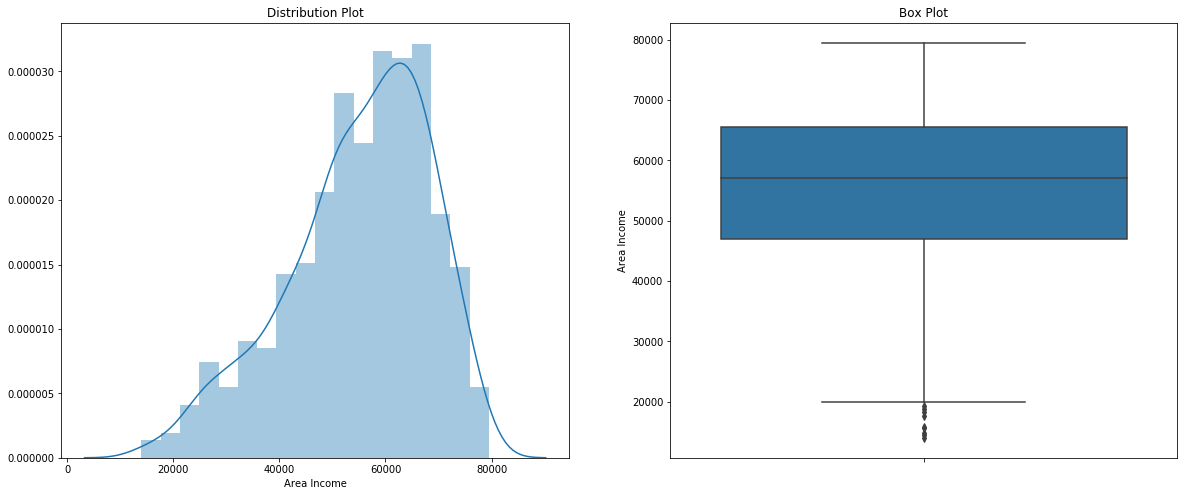

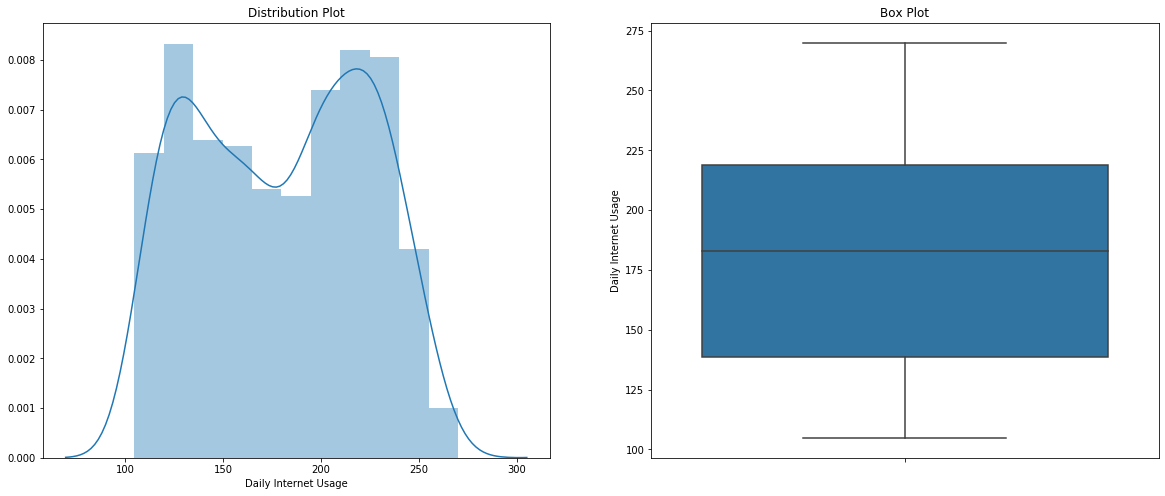

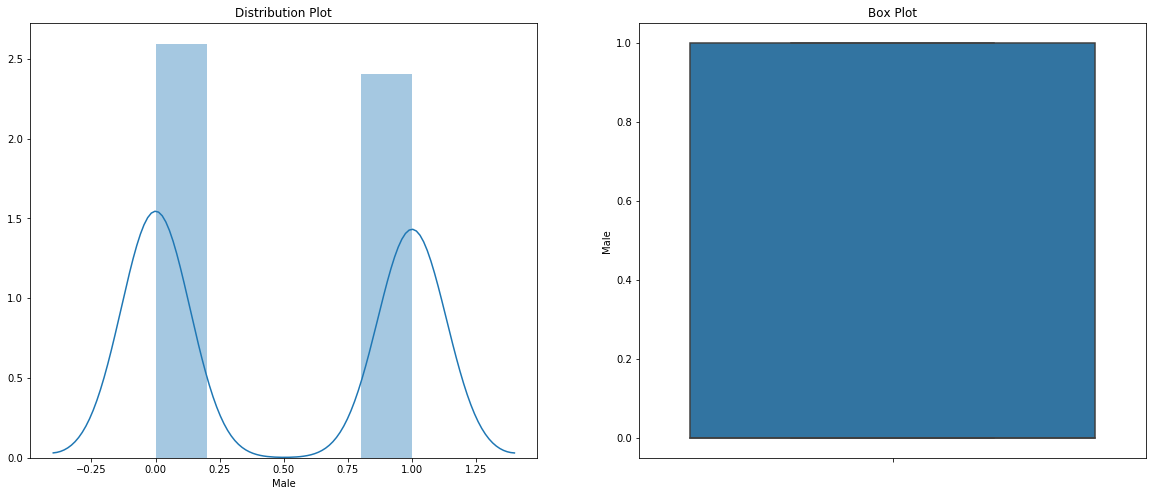

In [27]:
col_graph = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
for item in col_graph:
    outlier_graph(df=data,col=item,vartype=1)

In [28]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [32]:
data1 = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country',
        'Clicked on Ad']]

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['City']=le.fit_transform(data1['City'])
data1['Country']=le.fit_transform(data1['Country'])

In [65]:
data1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,68,35,61833.90,256.09,961,0,215,0
1,80,31,68441.85,193.77,903,1,147,0
2,69,26,59785.94,236.50,111,0,184,0
3,74,29,54806.18,245.89,939,1,103,0
4,68,35,73889.99,225.58,805,0,96,0
...,...,...,...,...,...,...,...,...
995,72,30,71384.57,208.58,126,1,116,1
996,51,45,67782.17,134.42,488,1,26,1
997,51,51,42415.72,120.37,798,1,140,1
998,55,19,41920.79,187.95,935,0,85,0


In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm = MinMaxScaler()
ss = StandardScaler()

In [66]:
data_col = [ 'Daily Time Spent on Site','Age','Area Income','Daily Internet Usage', 'Male','City','Country']x`

In [67]:
data_col = ss.fit_transform(data1[data_col])

In [78]:
X = pd.DataFrame(data_col, columns = [ 'Daily Time Spent on Site','Age','Area Income','Daily Internet Usage', 'Male','City','Country'])
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,City,Country
0,0.221258,-0.114905,0.509691,1.734030,-0.962695,1.700304,1.424572
1,0.978341,-0.570425,1.002530,0.313805,1.038750,1.492546,0.451875
2,0.284348,-1.139826,0.356949,1.287589,-0.962695,-1.344415,0.981136
3,0.599799,-0.798185,-0.014456,1.501580,1.038750,1.621499,-0.177517
4,0.221258,-0.114905,1.408868,1.038731,-0.962695,1.141508,-0.277648


In [79]:
y = data1['Clicked on Ad']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state =101,  test_size = 0.2 )

In [90]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((800, 7), (200, 7), (800,), (200,))

In [91]:
# distribution in training set
y_train.value_counts(normalize=True)

1    0.50625
0    0.49375
Name: Clicked on Ad, dtype: float64

In [92]:
y_test.value_counts(normalize=True)

0    0.525
1    0.475
Name: Clicked on Ad, dtype: float64

In [94]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [99]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [98]:
#checking the training score
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

1.0
0.91


In [100]:
#predictions on validation set
dt_model.predict(X_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [113]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [114]:
y_pred

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.])

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.91

# Changing the max depth

In [120]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=101)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [123]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.90625,0.880
1,2,0.94750,0.920
2,3,0.96375,0.925
3,4,0.97125,0.915
4,5,0.98125,0.945


No handles with labels found to put in legend.


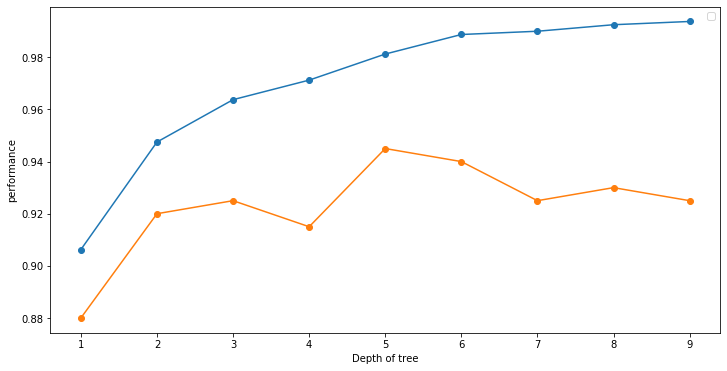

In [124]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [138]:
dt_model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=25, random_state=101)
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [139]:
#Training score
dt_model.score(X_train, y_train)

0.98875

In [140]:
#Validation score
dt_model.score(X_test, y_test)

0.93

In [149]:
Y_P = dt_model.predict(X_test)
accuracy_score(y_test, Y_P)

0.93

In [141]:
from sklearn import tree

In [142]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=6,filled=True)

In [143]:
!dot -Tpng tree.dot -o tree.png

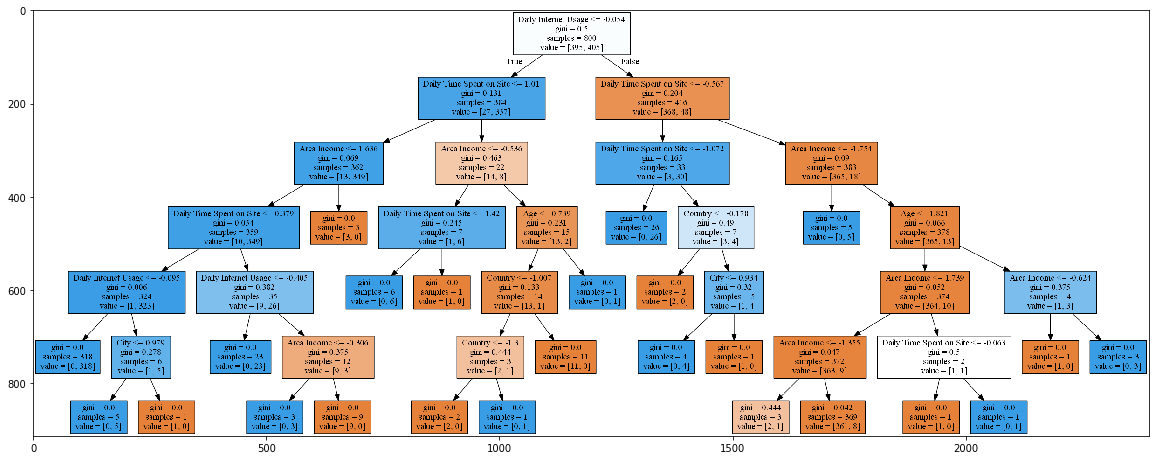

In [146]:
image = plt.imread('tree.png')
plt.figure(figsize=(20,8))
plt.imshow(image)

# https://courses.analyticsvidhya.com/courses/take/getting-started-with-decision-trees/lessons/8157461-introduction-to-decision-tree